# Apply KNN on Amazon fine food reviews


Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews

The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review


#### Objective:
Given the Amazon fine food review dataset, apply time based splitting of the reviews. Make 70% of them as Train dataset and remaining as Test dataset.
Apply 10-fold cross validation on Train dataset to find K for K-NN. Find Test accuracy of Test data and confusion matrix. Use BoW, TF-IDF, Avg-Word2Vec, TF-IDF-Word2Vec to vectorise the reviews.

In the t-SNE assignmnet, we have already did the data cleanup like deduplication, stemming, stop-word removal and Lemmatization. So here we are not doing the same thing again. We simply use those stored cleaned text for further analysis.






## Loading the data

The dataset is available in two forms
1. .csv file
2. SQLite Database

In order to load the data, We have used the SQLITE dataset as it easier to query the data and visualise the data efficiently.
<br> 


In [101]:
%matplotlib inline

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer


# using the SQLite Table to read filtered data
con = sqlite3.connect('amazon-fine-food-reviews/final.sqlite') 

#getting the dataset into a dataframe 
final = pd.read_sql_query("""
SELECT * FROM Reviews where ProfileName like "e%" order by Time
""", con) 

final_train = pd.read_sql_query("""
SELECT * FROM Reviews where ProfileName like "e%" order by Time 
limit cast(0.7*(select count(*) from Reviews where ProfileName like "e%") as integer) 
""" , con) 


final_test = pd.read_sql_query("""
SELECT * FROM Reviews where ProfileName like "e%" order by Time desc
limit cast(0.3*(select count(*) from Reviews where ProfileName like "e%") as integer) 
""" , con) 

In [102]:
final_train['Score'] = final_train['Score'].replace('positive',1)
final_train['Score'] = final_train['Score'].replace('negative',0)
final_test['Score'] = final_test['Score'].replace('positive',1)
final_test['Score'] = final_test['Score'].replace('negative',0)
final_train.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,417839,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,1,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,beetlejuic well written movi everyth excel act...
1,138000,149768,B00004S1C5,A7P76IGRZZBFJ,"E. Thompson ""Soooooper Genius""",18,18,1,975974400,Who Needs Wilton?,I'm sick of scads of nasty toothpicks all over...,sick scad nasti toothpick counter tint concept...
2,412716,446351,B0000YVCI0,A7V64BJ4FANV2,Emma R. Brashars,0,0,1,1077494400,You HAVE to try these,If you haven't tried these you need to now!<p>...,havent tri need incred order least twice amoun...
3,150402,163149,B00015UC8E,A20UAWANPNGCLY,"E. Funk ""dfunke1""",5,6,1,1081468800,Barry Farms,"Great product great service, fast shipping. Ve...",great product great servic fast ship professio...
4,36851,40041,B0000DG4MO,A1R91I3D97CMYX,Exxxxx,3,3,1,1085356800,HOTHOTHOTHOTHOTHOTHOT,This hot sauce is no joke. I've loved spicy f...,hot sauc joke ive love spici food sinc could w...


In [103]:
print(final.shape)
print(final_train.shape)
print(final_test.shape)

(11115, 12)
(7780, 12)
(3334, 12)


# Bag of Words (BoW)

In [104]:
from sklearn.preprocessing import normalize
count_vect = CountVectorizer() #in scikit-learn
final_train_X = count_vect.fit_transform(final_train['CleanedText'].values)
final_train_Y = final_train['Score'].values
final_test_X =  count_vect.transform(final_test['CleanedText'].values)
final_test_Y = final_test['Score'].values

final_train_X = normalize(final_train_X, norm='l1', axis=0)
final_test_X = normalize(final_test_X, norm='l1', axis=0)

unique, counts = np.unique(final_train_Y, return_counts=True)
print("final_train_Y distribution: %s" % dict(zip(unique, counts)))
unique, counts = np.unique(final_test_Y, return_counts=True)
print("final_test_Y distribution: %s" % dict(zip(unique, counts)))
print("So sampling required on the dataset as it has less number of negative datapoints")

final_train_Y distribution: {0: 1092, 1: 6688}
final_test_Y distribution: {0: 564, 1: 2770}
So sampling required on the dataset as it has less number of negative datapoints


In [98]:
# ============================== loading libraries ===========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
# =============================================================================================


The optimal number of neighbors is 9.


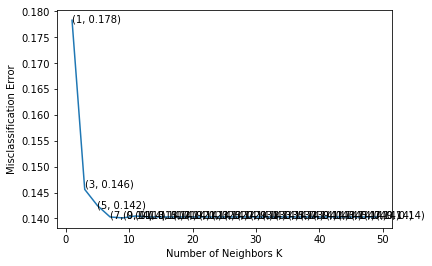

the misclassification error for each k value is :  [0.178 0.146 0.142 0.14  0.14  0.14  0.14  0.14  0.14  0.14  0.14  0.14
 0.14  0.14  0.14  0.14  0.14  0.14  0.14  0.14  0.14  0.14  0.14  0.14
 0.14 ]


In [105]:
# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# split the data set into train and test
X_1, X_test, y_1, y_test = cross_validation.train_test_split(final_train_X, final_train_Y, test_size=0.3, random_state=42)


# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_1,y_1)
    scores = cross_val_score(knn, X_1, y_1, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [25]:
print(cv_scores)

[0.8217074541531504, 0.8543882964265451, 0.8575095911688599, 0.8597141231227848, 0.8598982839430761, 0.8595313114660119, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622]


In [28]:
# ============================== KNN with k = optimal_k ===============================================
from sklearn.metrics import confusion_matrix
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(final_train_X, final_train_Y)


# predict the response
pred = knn_optimal.predict(final_test_X)

# evaluate accuracy
acc = accuracy_score(final_test_Y, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))
print("Confusion matrix is:")
confusion_matrix(final_test_Y, pred, labels=None, sample_weight=None)


The accuracy of the knn classifier for k = 9 is 83.503299%
Confusion matrix is:


array([[  18,  546],
       [   4, 2766]], dtype=int64)

Observation: We found that K=9 is the optimal value. And accuracy on the test dataset is 83.503299%

# TF-IDF

In [36]:
from sklearn.preprocessing import normalize
tf_idf_vect = TfidfVectorizer()
final_train_X = tf_idf_vect.fit_transform(final_train['CleanedText'].values)
final_train_Y = final_train['Score'].values
final_test_X =  tf_idf_vect.transform(final_test['CleanedText'].values)
final_test_Y = final_test['Score'].values
final_train_X = normalize(final_train_X, norm='l1', axis=0)
final_test_X = normalize(final_test_X, norm='l1', axis=0)

unique, counts = np.unique(final_train_Y, return_counts=True)
print("final_train_Y distribution: %s" % dict(zip(unique, counts)))
unique, counts = np.unique(final_test_Y, return_counts=True)
print("final_test_Y distribution: %s" % dict(zip(unique, counts)))
print("So sampling required on the dataset as it has less number of negative datapoints")

final_train_Y distribution: {0: 1092, 1: 6688}
final_test_Y distribution: {0: 564, 1: 2770}
So sampling required on the dataset as it has less number of negative datapoints


In [89]:
print(final_tf_idf.get_shape())
print(final_train_X.get_shape())

(11115, 13630)
(7780, 11656)


In [38]:
features = tf_idf_vect.get_feature_names()
len(features)
features[200:210]

['airbrush',
 'airfar',
 'airhead',
 'airi',
 'airlin',
 'airplan',
 'airport',
 'airtight',
 'aisl',
 'aju']

In [34]:
# source: https://buhrmann.github.io/tfidf-analysis.html
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

top_tfidf = top_tfidf_feats(final_tf_idf[1,:].toarray()[0],features,25)


The optimal number of neighbors is 7.


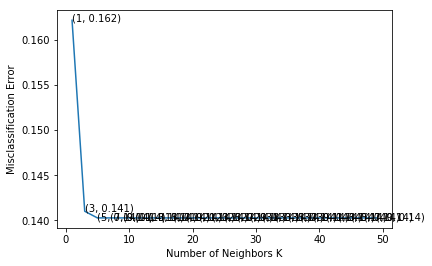

the misclassification error for each k value is :  [0.162 0.141 0.14  0.14  0.14  0.14  0.14  0.14  0.14  0.14  0.14  0.14
 0.14  0.14  0.14  0.14  0.14  0.14  0.14  0.14  0.14  0.14  0.14  0.14
 0.14 ]


In [39]:
# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# split the data set into train and test
X_1, X_test, y_1, y_test = cross_validation.train_test_split(final_train_X, final_train_Y, test_size=0.3, random_state=42)


# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_1, y_1)
    scores = cross_val_score(knn, X_1, y_1, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [40]:
print(cv_scores)

[0.8378603502092441, 0.8589774860191077, 0.8597137883029007, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622, 0.8597144616491622]


In [41]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(final_train_X, final_train_Y)

# predict the response
pred = knn_optimal.predict(final_test_X)

# evaluate accuracy
acc = accuracy_score(final_test_Y, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))
print("Confusion matrix is:")
confusion_matrix(final_test_Y, pred, labels=None, sample_weight=None)


The accuracy of the knn classifier for k = 7 is 83.503299%
Confusion matrix is:


array([[  24,  540],
       [  10, 2760]], dtype=int64)

Observation: We found that K=7 is the optimal value. And accuracy on the test dataset is 83.503299%

#  Word2Vec

In [42]:
# Using Google News Word2Vectors
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

# in this project we are using a pretrained model by google
# its 3.3G file, once you load this into your memory 
# it occupies ~9Gb, so please do this step only if you have >12G of ram
# we will provide a pickle file wich contains a dict , 
# and it contains all our courpus words as keys and  model[word] as values
# To use this code-snippet, download "GoogleNews-vectors-negative300.bin" 
# from https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit
# it's 1.9GB in size.


model = KeyedVectors.load_word2vec_format('amazon-fine-food-reviews/GoogleNews-vectors-negative300.bin', binary=True)

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned



C:\Users\Swapnanil\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [52]:
# Train your own Word2Vec model using your own text corpus
import gensim
import re
i=0
list_of_sent=[]
for sent in final_train['CleanedText'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent.append(filtered_sentence)
    

In [53]:
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,size=50, workers=4)    
print(w2v_model)

Word2Vec(vocab=4029, size=50, alpha=0.025)


#  Avg W2V, TFIDF-W2V

In [54]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))
#print(sent_vectors[0])

7780
50



The optimal number of neighbors is 19.


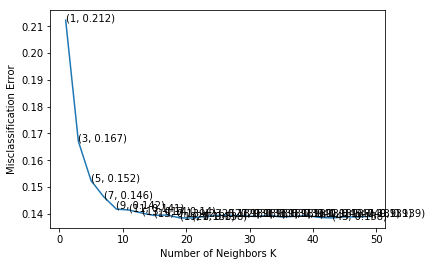

the misclassification error for each k value is :  [0.212 0.167 0.152 0.146 0.142 0.141 0.14  0.139 0.14  0.138 0.138 0.139
 0.139 0.139 0.139 0.139 0.139 0.139 0.139 0.139 0.139 0.138 0.139 0.139
 0.139]


In [55]:
# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# split the data set into train and test
X_1, X_test, y_1, y_test = cross_validation.train_test_split(sent_vectors, final_train_Y, test_size=0.3, random_state=42)


# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_1, y_1, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [56]:
print(cv_scores)

[0.7877361493291742, 0.8329132739899066, 0.8476050123648612, 0.8536614185194191, 0.8582495937683472, 0.8586165699519045, 0.8597174910895904, 0.8606372820829108, 0.8604521118609758, 0.861553031763164, 0.8615520223615205, 0.86100257181207, 0.8606345874623667, 0.8606359353903876, 0.8608190843380401, 0.8610029078674518, 0.8606362714457696, 0.8611867313968636, 0.86100257181207, 0.860635262044126, 0.8613698828155115, 0.861553031763164, 0.8611857219952201, 0.8611857219952201, 0.8610018984658083]


In [58]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(final_train_X, final_train_Y)

# predict the response
pred = knn_optimal.predict(final_test_X)

# evaluate accuracy
acc = accuracy_score(final_test_Y, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))
print("Confusion matrix is:")
confusion_matrix(final_test_Y, pred, labels=None, sample_weight=None)


The accuracy of the knn classifier for k = 19 is 83.083383%
Confusion matrix is:


array([[   0,  564],
       [   0, 2770]], dtype=int64)

In [84]:
print(len(tf_idf_vect.get_feature_names()))
print(final_train_X.shape)
print(list_of_sent[1])

11656
(7780, 11656)
['sick', 'scad', 'nasti', 'toothpick', 'counter', 'tint', 'concept', 'one', 'long', 'overdu', 'except', 'welcom', 'color', 'vibrant', 'offens', 'tast', 'blend', 'opinion', 'smooth', 'wilton', 'past', 'youll', 'need', 'experi', 'bit', 'get', 'hue', 'right', 'first', 'well', 'worth']


Observation: We found that K=19 is the optimal value. And accuracy on the test dataset is 83.083383%

In [88]:
# TF-IDF weighted Word2Vec
tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum = 0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tf_idf = final_train_X[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1


The optimal number of neighbors is 19.


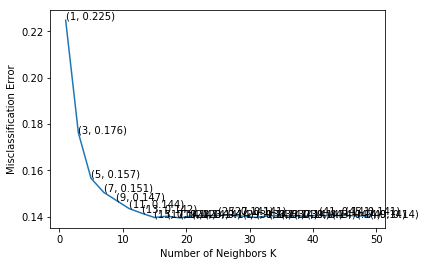

the misclassification error for each k value is :  [0.225 0.176 0.157 0.151 0.147 0.144 0.142 0.14  0.14  0.14  0.14  0.14
 0.141 0.141 0.14  0.14  0.14  0.14  0.14  0.14  0.141 0.14  0.141 0.14
 0.14 ]


In [91]:
# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# split the data set into train and test
X_1, X_test, y_1, y_test = cross_validation.train_test_split(tfidf_sent_vectors, final_train_Y, test_size=0.3, random_state=42)


# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_1, y_1, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [92]:
print(cv_scores)

[0.7752573615896605, 0.8237247983173509, 0.8433774109502657, 0.8494351675038398, 0.8529210736870614, 0.8564090023800628, 0.8584283690540435, 0.8602662670572816, 0.8597164804524491, 0.860450427877573, 0.8595319848122734, 0.8595309741751322, 0.8593471494102228, 0.8593471494102228, 0.8597137870674029, 0.8602649203647583, 0.8595309741751322, 0.8595316475213938, 0.8595313114660119, 0.8597144616491622, 0.8593474879366003, 0.8595306381197503, 0.8593474879366003, 0.8595313114660119, 0.8597144616491622]


In [93]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(final_train_X, final_train_Y)

# predict the response
pred = knn_optimal.predict(final_test_X)

# evaluate accuracy
acc = accuracy_score(final_test_Y, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))
print("Confusion matrix is:")
confusion_matrix(final_test_Y, pred, labels=None, sample_weight=None)


The accuracy of the knn classifier for k = 19 is 83.083383%
Confusion matrix is:


array([[   0,  564],
       [   0, 2770]], dtype=int64)

Observation: We found that K=19 is the optimal value. And accuracy on the test dataset is 83.083383%